### Sections

1. [Introduction](#1)
2. [What is inferential statistics?](#2)
3. [Sampling](#3)  
    3.1. [Sample vs population](#3-1)  
    3.2. [Representative sample](#3-2)  
    3.3. [Simple random sampling](#3-3)  
    3.4. [Stratified random sampling](#3-4)  
4. [Central Limit Theorem ](#4)  
    4.1. [Definition](#4-1)  
    4.2. [An example](#4-2)  
    4.3. [Verifying the Central Limit Theorem in practice ](#4-3)  
5. [Standard error](#5)  
6. [Confidence intervals](#6)  
    6.1. [Definition](#6-1)  
    6.2. [The empirical rule](#6-2)  
    6.3. [The z-table](#6-3)  
    6.4. [Confidence intervals in practice](#6-4)  
    6.5. [External learning resources](#6-5)  
7. [Hypothesis testing ](#6)  
    7.1. [What is a hypothesis?](#7-1)  
    7.2. [The null hypothesis vs the alternative hypothesis](#7-2)  
    7.3. [Type I error](#7-3)  
    7.4. [Type II error](#7-4)  
    7.5. [The p-value](#7-5)  
    7.6. [Statistical tests](#7-6)  
    7.7. [One sample z-test](#7-7)  
    7.8. [Two sample z-test](#7-8)  
    7.9. [The t-test](#7-9)  
    7.10. [Other tests ](#7-10)  

# 1. Introduction <a id='1'></a>

In this notebook we will cover some topics in inferential statistics, while working with the [Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). The code cell below loads the dataset into a `DataFrame` object, stores it in the variable `df` and then displays it.

In [1]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Each row in this `DataFrame` contains some information about a person. The "Outcome" row contains information on whether or not the person has diabetes (`1` means they have diabetes, while `0` means they do not). There is some data cleaning that could be done on this dataset first, such as replacing `0` with missing values in columns, where the value `0` is definitely not possible (eg. "SkinThickness" or "BloodPressure"). However, for now we will skip the data cleaning/data preparation process.

# 2. What is inferential statistics? <a id='2'></a>

Inferential statistics is a branch of statistics that uses data from a sample to make inferences or conclusions about a larger population. In simple terms, it is a way to use information from a small group to make predictions or estimates about a larger group. For example, a political poll may survey a small group of people to make predictions about how all people in a certain area will vote in an election. 

Inferential statistics also involves testing hypotheses about a population based on the data obtained from a sample. For example, a researcher might have a theory that a new drug is effective in treating a certain disease, and use hypothesis testing to determine if the data from a study of the drug supports or rejects that theory.

# 3. Sampling <a id='3'></a>

## 3.1. Sample vs population <a id='3-1'></a>

A sample is a subset of a population. The population is the entire group of individuals or objects that we are interested in studying. For example, if we want to study the number of tree species in a certain forest, the population would be all the tree species in that forest. A sample, on the other hand, would be a smaller group of tree species selected from the population.

## 3.2. Representative sample <a id='3-2'></a>

A representative sample is a small group of individuals or objects that is chosen from a larger group (the population) in such a way that it accurately reflects the characteristics of the larger group. Imagine you want to know the average height of all the students in your school. It would be impossible to measure the height of every student, so instead, you might choose a smaller group of students (the sample) and measure their heights. If the sample is representative, it should have the same average height as the entire school population, so you can use the sample to make inferences about the population.

## 3.3. Simple random sampling

Simple random sampling is a method of selecting a sample from a population in which each individual or object has an equal chance of being selected. This is typically done by using a random number generator or a random sampling tool, such as a random number table, to select individuals or objects from the population. For example, if we are sampling from a population of 1000 individuals, each individual has a $\frac{1}{1000}$ chance of being selected.

The goal of simple random sampling is to ensure that the sample is representative of the population, and that the sample is selected in a unbiased way. This method is widely used in statistical research as it allows for accurate generalizations to be made about the population based on the sample.

## 3.4. Stratified random sampling <a id='3-4'></a>

Stratified random sampling is a method of sampling where the population is divided into smaller groups, called strata, based on certain characteristics. The sample is then chosen by randomly selecting individuals or objects from each stratum. This method is used when the population has subgroups that have different characteristics and it is important to ensure that these subgroups are represented in the sample.

For example, if you want to study the average income of people in a city, you might divide the population into strata based on income levels (low, medium, high). Then, you would randomly select individuals from each stratum to ensure that the sample accurately reflects the income distribution of the population.

Stratified random sampling can be more effective than simple random sampling in ensuring that the sample is representative of the population, but it can also be more time-consuming and expensive.

# 4. Central Limit Theorem <a id='4'></a>

## 4.1. Definition <a id='4-1'></a>

**Below is a somewhat formal definition of the Central Limit Theorem. It's not easy to grasp, especially if this is the first time you're learning about the Central Limit Theorem. Don't worry though, things will get clearer in the next subsections, as you will see some examples.**

The Central Limit Theorem is a fundamental concept in statistics that states that, given a large enough sample size, the distribution of sample means will be approximately normal, regardless of the shape of the population distribution. In other words, as the sample size increases, the distribution of sample means will become more and more like a normal distribution, even if the population distribution is not normal.

## 4.2. An example <a id='4-2'></a>

Here is an example: imagine you want to know the average height of all adult males in a certain country. But instead of measuring the height of every adult male, which would be impractical, you decide to take a sample of 100 adult males at random. You measure their heights and calculate the average height of this sample, let's say it's 175 cm. Now you repeat this process multiple times, each time taking a sample of 100 adult males and calculating the average height of each sample.

According to the Central Limit Theorem, even though the population of adult males in the country may have a different distribution of heights, the distribution of the average heights of all these samples will be approximately normal and will have a mean equal to the population mean. This means that you can use the normal distribution to make inferences about the population mean, such as computing a confidence interval for the population mean, or testing a hypothesis about the population mean (more on that in later sections).

In other words, the central limit theorem tells us that if we take many random samples from a population, the mean of those samples will be similar to the mean of the population, and the way those averages are distributed will be in a bell-shaped curve, which is characteristic of the normal distribution. It is also worth knowing that The Central Limit Theorem has several assumptions, such as random sampling, independence of observations, and a large sample size. The exact definition of "large sample size" can vary depending on the context and the population distribution, but it is generally considered to be 30 or more.

## 4.3. Verifying the Central Limit Theorem in practice <a id='4-3'></a>

Let's verify the Central Limit Theorem in practice. To do this, let's first assume that the rows in the `DataFrame` stored in the variable `df` represent the entire population. In this case, the size of our population is 768:

In [8]:
len(df)

768

As a reminder, let's preview the dataframe:

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


So our dataframe consists of 767 people, for whom we have measured certain features. Let's take "Age" as the feature for which we will verify the Central Limit Theorem. Let's check the mean age, as well as the data distribution:

In [18]:
df["Age"].mean()

33.240885416666664

<AxesSubplot: >

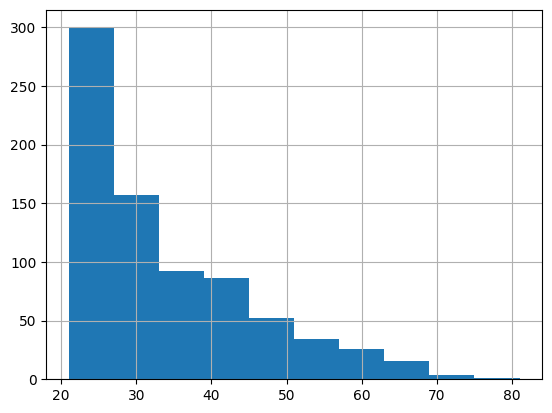

In [19]:
df["Age"].hist()

The data distribution is clearly not a normal distribution. Instead, we see a clear patter that as the age increases, the frequency decreases. The Central Limit Theorem tells us that if we take many samples from our population, the distribution of the mean age of those samples will be normal, regradless of the distribution of the population. Let's verify this!

Let's first take a sample from our dataframe. We can do this using the `DataFrame.sample()` method:

In [22]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
372,0,84,64,22,66,35.8,0.545,21,0
688,1,140,74,26,180,24.1,0.828,23,0
715,7,187,50,33,392,33.9,0.826,34,1
521,3,124,80,33,130,33.2,0.305,26,0
207,5,162,104,0,0,37.7,0.151,52,1


As we can see above, the `df.sample(5)` method returned a dataframe with 5 rows that were randomly sampled from the dataframe stored in `df`. Let's now take a bigger sample and calculate the mean age of that sample:

In [35]:
df.sample(50)["Age"].mean()

32.42

Now let's repeat this process a 1000 times and then plot a histogram showing the distribution of the mean age of our samples:

<AxesSubplot: xlabel='Sample mean', ylabel='Frequency'>

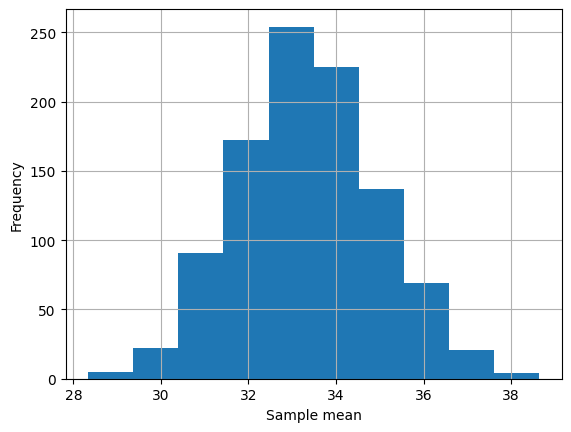

In [11]:
sample_size = 50
num_samples = 1000

sample_means = []
for i in range(num_samples):
    sample_means.append(df.sample(sample_size)["Age"].mean())

sample_means = pd.Series(sample_means, name="mean")

plot = sample_means.hist()
plot.set_xlabel("Sample mean")
plot.set_ylabel("Frequency")
plot

Indeed we see that the distribution of sample means is normal. We can also see that the mean of the sample means is close to the population mean:

In [34]:
print("mean of sample means:", pd.Series(sample_means).mean())
print("population mean:", df["Age"].mean())

mean of sample means: 33.17756
population mean: 33.240885416666664


# 5. Standard Error <a id='5'></a>

If we take a look at our sample means, we can see that the sample means vary due to random sampling, which means they have some non-zero standard deviation:

In [20]:
sample_means

0      35.44
1      32.86
2      33.40
3      32.24
4      31.36
       ...  
995    31.72
996    33.66
997    33.92
998    32.32
999    31.50
Name: mean, Length: 1000, dtype: float64

Let's see what the standard deviation is:

In [22]:
sample_means.std()

1.5201451644237536

The standard deviation of sample means is called the **standard error** of the mean. In general, the standard error is the standard deviation of a sampling distribution - in this case, it is the sampling distribution of the mean age.

The higher the standard error of the mean, the less likely it is that our sample mean is close to the true population mean. This is because a high standard error of the mean is a consequence of the high standard deviation of a population parameter, whose mean we are trying to estimate. However, if we have a good approximation of the standard error of the mean, we can know by how much - on average - each sample mean differs from the true population mean.


In the case of `sample_means`, the standard error is approximately `1.52`. This means that, on average, the mean age in a sample is off by roughly 1.52 from the true population mean age. However, this is only an approximation of the standard error, derived from the standard deviation of the means of 1000 samples. We can calculate the standard error of the mean precisely, if we know the standard deviation of the population (which in this case we do). To do so, we can use the following formula:

$ SE = \large \frac{\sigma}{\sqrt{n}} $

where

1. $ \sigma $ is the standard deviation of the population
2. $ n $ is the sample size

Let's calculate the true standard deviation of our population:

In [8]:
population_std = df["Age"].std()
standard_error = population_std / (sample_size ** 0.5)
standard_error

1.6631478941475635

As we can see our approximation of the standard error is close to the true standard error. If we have a good approximation of the standard error of the sample mean, we can then include this knowledge in our estimates - one way to do this is through confidence intervals (we will go over confidence intervals in the next section).

However, in practice, gathering many samples or calculating the standard deviation of a population is often impractical due to various reasons, such as being too expensive time-wise or money-wise.  Fortunately, there is a way to approximate the standard error of the sample mean with only a single sample. To do this, we simply use the standard deviation of the sample instead of the standard deviation of the population:

In [9]:
sample_std = df.sample(sample_size)["Age"].std()
standard_error = sample_std / (sample_size ** 0.5)
standard_error

1.565247584249853

As we can see, this is a good approximation of the true standard error.

# 6. Confidence intervals <a id='6'></a>

## 6.1 Definition <a id='6-1'></a>

A confidence interval is a range of values that is likely to contain the true value of a population parameter, such as the mean, with a certain level of confidence. For example, a 95% confidence interval for the mean of a population means that if we were to repeat the sampling process many times and create a confidence interval each time, approximately 95% of those intervals would contain the true population mean.

Below is the formula for calculating a confidence interval:

$ \large CI = \bar{x} \pm z \cdot SE $

where 

1. $ \large \bar{x}$ is the sample mean.
2. $ \large z$  is a value derived based on the normal distribution and the chosen confidence level (we will cover what that means in a bit)
3. $ SE $ is the standard error

You are already familiar with how to calculate the sample mean and the standarard error, however, we have not yet discussed how to calculate the $ \large z$ value based on the confidence level. In order to do so, we will first discuss the "empirical rule".

## 6.2. The empirical rule <a id='1'></a>

The empirical rule, also known as the 68-95-99.7 rule, is a guideline for interpreting data that has been distributed normally. It states that for a normal distribution, approximately 68% of the data will fall within one standard deviation of the mean, approximately 95% of the data will fall within two standard deviations of the mean, and approximately 99.7% of the data will fall within three standard deviations of the mean.

Let's verify the empirical rule with empirical data. As you may recall, we have previously created a variable called `sample_means`, which holds 1000 values, each corresponding to the mean age, calculated from a 1000 samples. The Central Limit Theorem states that the distribution of sample means is normal. Let's verify this once again quickly:

<AxesSubplot: >

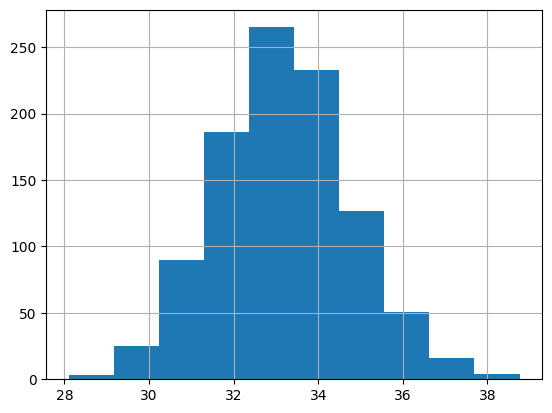

In [4]:
sample_means.hist()

Now let's create a function that will calculate the percentage of values that lies within a range, defined by the mean value $\pm$ some number of standard deviations (range = $  \bar{x} \pm n \sigma$, where $n$ is the number of standard deviations). For example, a range of two standard deviations from the mean can be calculated in the following way: 

In [12]:
n = 2
lower_bound = sample_means.mean() - sample_means.std() * n
upper_bound = sample_means.mean() + sample_means.std() * n
print(f"range from {lower_bound} to {upper_bound}")

range from 30.127479222935 to 36.571480777064984


Now let's define a function that will calculate the percentage of values within a given range:

In [13]:
def percentage_of_values_in_range(s, n):
    mask_1 = s >= s.mean() - s.std() * n
    mask_2 = s <= s.mean() + s.std() * n
    full_mask = mask_1 & mask_2
    return len(s[full_mask]) / len(s)

Now, let's call the function to see what percentage of values in our `sample_means` series lie within 1, 2, and 3 standard deviations from the mean:

In [14]:
print(percentage_of_values_in_range(sample_means, 1))
print(percentage_of_values_in_range(sample_means, 2))
print(percentage_of_values_in_range(sample_means, 3))

0.669
0.956
0.998


As we can see, the values are approximately 69-95-99.7, in accordance with the empirical rule. Let's repeat this for some other data. For example, let's choose the "BloodPressure" column, which is also normally distributed:

<AxesSubplot: >

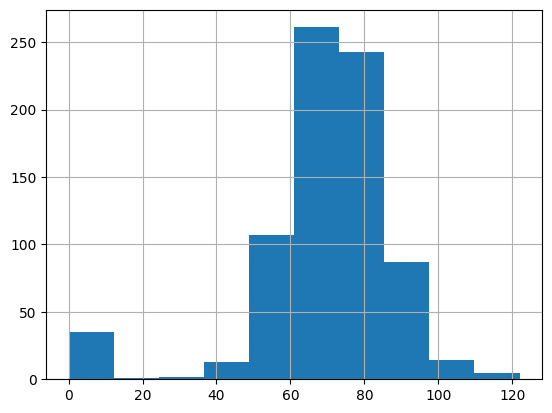

In [15]:
df["BloodPressure"].hist()

We can see that the distribution of data in the "BloodPressure" column is approximately normal. However, we also see a bump on the very left of the histogram. This is because some of the values in that column are `0`:

In [16]:
df["BloodPressure"].value_counts()[0]

35

This is certainly a mistake, as the blood pressure cannot be `0`. In this case, we should convert the `0` values to missing values:

<AxesSubplot: >

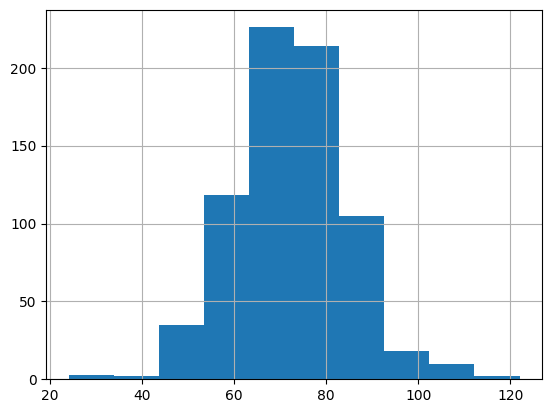

In [17]:
df["BloodPressure"] = df["BloodPressure"].replace(0, None)
df["BloodPressure"].hist()

In [18]:
for i in range(1, 4):
    print(percentage_of_values_in_range(df["BloodPressure"], i))

0.6484375
0.9153645833333334
0.9440104166666666


The data in the "BloodPressure" column also follows the empirical rule approximately, although not as closely as the sample means.z

## 6.3. The z-table <a id='6-3'></a>

If we want to calculate a 95% confidence interval for our sample mean, we want to find a range of values, which has a 95% chance of containing the true population mean. In other words, if we took many samples and calculated 95% confidence intervals each time, about 95% of those confidence intervals would contain the true population mean.

The standard error is the standard deviation of sample means (or an approximation), and the empirical rule tells us that approximately 95% of values fall within 2 standard deviations from the mean. This means that approximately 95% of our sample means will fall within two standard deviations of the true population mean (given large enough samples gathered via random sampling).

Therefore, if we calculated the standard error and the sample mean (which is an approximation of the true population mean), we can calculate confidence intervals with the following formula:

$ \large CI = \bar{x} \pm z \cdot SE $

where $\bar{x}$ is the sample mean, $SE$ is the standard error, and $\large z$ is the number of standard deviations that correspond to the confidence level. We know that for a 95% confidence level, this is approximately 2 standard deviations. But what about a 94% or 90% confidence level? In this case, we can check the z-table, which contains the number of standard deviations for any confidence level - not just 68%, 95% and 97.5%. You can learn more about the z-table [here](https://www.ztable.net/).

## 6.4. Confidence intervals in practice <a id='6-4'></a>

Let's gather a sample of size `50` and calculate the mean age, along with a 95% confidence interval. The first step is get a sample from our "population":

In [19]:
sample_size = 50
s = df["Age"].sample(sample_size)

Next we can calculate the standard error, based on our sample (which will be an approximation of the standard deviation of sample means):

In [20]:
standard_error = s.std() / (sample_size**0.5)

Now that we have the standard error, we can calculate the confidence interval. If we check the [z-table](https://www.ztable.net/), we can see that for a 95% confidence interval, we actually want a range of 1.96 standard deviations from the mean.

In [23]:
lower_bound = sample_means.mean() - 1.96 * standard_error
upper_bound = sample_means.mean() + 1.96 * standard_error

print(f"95% confidence interval for the mean age: {lower_bound.round(2)} - {upper_bound.round(2)}")

95% confidence interval for the mean age: 30.05 - 36.65


## 6.5. External learning resources <a id='6-5'></a>

Feel free to check out [this video](https://www.youtube.com/watch?v=TqOeMYtOc1w&ab_channel=StatQuestwithJoshStarmer), which contains an excellent explanation of confidence intervals.

# 7. Hypothesis testing <a id='7'></a>

## 7.1. What is a hypothesis? <a id='7-1'></a>

A hypothesis is like a guess or a prediction about something. It's an explanation or an idea that can be tested through observation and experimentation. For example, a hypothesis might be "I think that taking vitamin C will help prevent colds," or "I think that the average height of adult men is 1 meter and 72 centimeters". 

In order to test a hypothesis using statistics, we have to be able to express the hypothesis in mathematical terms. For example, the hypothesis that "the average height of adult men is 1 meter and 72 centimeters" is a statement about the mean height of the population of adult men. It is already expressed mathematically, and we could write it down more formally as: $\mu = 1.72 $.

In the case of the hypothesis about vitamin C preventing colds, we could set up an experiment, in which we randomly sample a population of people and split them into two groups - one group receives vitamin C and another other group (the control group) receives a placebo. We could then express our hypothesis more mathematically by stating that the mean number of colds is lower in the **population** of people that take vitamin C. We would then test this hypothesis based on our **sample**. This hypothesis could be expressed symbolically as: $\mu_1 \lt \mu_2$, where $\mu_1$ is the mean number of colds in the **population** of people who take vitamin C, and $\mu_2$ is the mean number of colds in the **population** of people who don't take vitamin C.

However, simply observing a lower mean number of colds in our **sample** of people who received vitamin C is not enough to prove our hypothesis. This is due to the inherent variability in random sampling. In other words, there are likely differences in various characteristics (such as the mean number of colds) between our two groups, which may be the due to the nature of random sampling and not vitamin C. Therefore, we have to test whether the difference between the means of the two groups is statistically significant (this is where statistical tests come into play). Only then can we determine whether the data supports our hypothesis.

## 7.2. The null hypothesis vs the alternative hypothesis <a id='7-2'></a>

Whenever we are testing a hypothesis with statistical tests, we are actually considering two contradictory hypotheses called: 

1. the **null hypothesis** (typically denoted by $H_0$). The null hypothesis typically states that there is no relationship between two variables or that there is no difference between two groups.
2. the **alternative hypothesis** (typically denoted by $H_a$). The alternative hypothesis is contradictory to the null hypothesis and typically states that there is a relationship between two variables or that there is a difference between two groups.

For example, a nutritionist may want to test the hypothesis that a certain diet plan causes weight loss. In this case, the null hypothesis would be that the diet plan does not cause weight loss, while the alternative hypothesis would be that the diet plan does cause weight loss.

Of course these hypotheses should be expressed mathematically. We can imagine the nutritionist collecting a representative sample of people and assigning them to two groups - one on the diet plan, and one not on the diet plan (the control group). In this case, the null hypothesis is that the mean weight of people on the diet plan is equal to or greater than the mean weight of people not on the diet plan. The alternative hypothesis is that the mean weight of people on the diet plan is smaller than the mean weight of people not on the diet plan. These hypothesis can be expressed symbolically in the following way:

$H_0: \mu_1 \geq \mu_2$

$H_a: \mu_1 < \mu_2 $

where $\mu_1$ is the mean weight of the population of people on the diet plan, and $\mu_2$ is the mean weight of the population of people not on the diet plan.

If the null hypothesis is true, it implies the following: if the mean weight of the diet plan group happens to be smaller than the mean weight of the control group, this difference arose simply due to chance, as a result of the inherent variability of the population parameter (weight in this case), combined with the process of random sampling.

Once we have ran the experiment and calculated the mean weights of the two groups, we can ask the following question: how likely were we to obtain such results, if the null hypothesis is true? This is the question that statistical tests answer, and the answer they give is called the **p-value**. The **p-value** is the probability of observing our data, if the null hypothesis is true (more will be said about p-values later). If we find that the probability of observing our data is very small, we reject the null hypothesis, because this would mean that the smaller mean weight in the diet plan group is unlikely to have been caused by random sampling.

Based on the framework above, there are two types of errors we can make:

1. A **type I error** occurs when we the null hypothesis is true, but we reject it.
2. A **type II error** occurs when the null hypothesis is false, but we do not reject it.

## 7.3. Type I error <a id='7-3'></a>

A type I (type one) error is when a false positive occurs. More specifically, it means we reject the null hypothesis, when it is actually true. The probability of making a type 1 error is represented by the Greek letter alpha (α) and is also known as the level of significance. A common threshold for the level of significance is 0.05, which means that there is a 5% chance of making a type 1 error.

An example of a type 1 error could be when a researcher conducts a study to determine if there is a significant difference in exam scores between students who study with flashcards and students who study without them. The researcher sets the significance level at 0.05 and finds that there is a significant difference in exam scores between the two groups. However, in reality, there is no difference in exam scores and the significant difference found in the study is due to chance. This would be a type 1 error because the researcher incorrectly rejected the null hypothesis that there is no difference in exam scores between the two groups of students.

## 7.4. Type II error <a id='7-4'></a>

A type 2 error in statistics, also known as a false negative, occurs when a false null hypothesis is not rejected. This type of error results in failing to detect an effect that is actually present.

Suppose a medical researcher is testing a new drug to determine if it can cure a certain disease. The null hypothesis is that the new drug has no effect on the disease (i.e., it is not a cure), and the alternative hypothesis is that the drug is effective in curing the disease. In this case, a type 2 error would occur if the researcher performs the test and fails to reject the null hypothesis (concludes that the drug is not a cure), when in fact it is. This means that the researcher has missed the opportunity to identify a cure for the disease, simply because the sample size was too small or the test was not powerful enough to detect the true effect of the drug.

## 7.5. The p-value <a id='7-5'></a>

The p-value is a numerical measure used to determine the strength of evidence against the null hypothesis. It represents the probability of observing our data (the sample(s) we collected), if the null hypothesis is true. We can obtain a p-value via statistical tests, such as the z-test or t-test, which we will cover in the next subsections.

If the p-value is something small, like 0.03, it means that there's a 3% chance of observing our data, if the null hypothesis is true. This means that the data provides strong evidence against the null hypothesis. Usually before performing statistical tests, researches will choose a significance level (denoted by $\alpha$). If the p-value is smaller than the chosen significance level ($P < \alpha$), we reject the null hypothesis in favor of the alternative hypothesis. On the other hand, if the p-value is greater than the significance level ($P > \alpha$), it means that the data is consistent with the null hypothesis, and there is not enough evidence to reject it.

A common significance level is 0.05 ($\alpha = 0.05$). If we assume such a level of significance, and we obtain a p-value of 0.03, we would reject the null hypothesis in favor of the alternative hypothesis. Conversely, if our p-value was 0.09, we would not reject the null hypothesis. Feel free to check out [this video](https://www.youtube.com/watch?v=vemZtEM63GY&ab_channel=StatQuestwithJoshStarmer) for a more in-depth explanation of p-values.

## 7.6 Statistical tests <a id='7-6'></a>

We recommended that you watch [this video](https://www.youtube.com/watch?v=QZ7kgmhdIwA&list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S&index=27&ab_channel=CrashCourse) on test statistics, before proceeding with the rest of this notebook. This is because the material in the subsequent subsections relies on the knowledge presented in this video. 

## 7.7. One sample z-test <a id='7-7'></a>

Although a **z-test** is not performed very often, as it requires knowing the standard deviation of a population (which rarely happens in the real world), learning about the **z-test** will help you build an intuitive understanding of what statistical testing is all about. Additionally, once you understand the **z-test**, you will be able to understand the **t-test** (since it is similar), which is used more often in the real world.

The z-test can be performed with one sample or two samples. In a one sample z-test, we are trying to test a hypothesis about the parameter of a population, based on the sample we obtained. For example, we may have a hypothesis that, on average, professional swimmers train for more than 2.5 hours per day. In this case, our null hypothesis will be that the mean training time of the population of professional swimmers is less than or equal to 2.5 hours per day ($H_0: \mu \leq 2.5$), and our alternative hypothesis is that the mean is greater than 2.5 hours per day ($H_a: \mu \gt 2.5$).

We can then collect self-reported training times from a random sample of professional swimmers. Once we have our data, we can use a z-test to determine whether the data in our **sample** supports our hypothesis about the **population**. More specifically, the z-test will yield a value called the z-statistic or z-score, which tells us how far away our sample mean is from the "most extreme" null hypothesis mean, in terms of the standard error (which is the standard deviation of sample means). In this case, the "most extreme" mean in the null hypothesis is 2.5, as this mean is on the boundary between the null hypothesis and the alternative hypothesis - a mean greater than 2.5 would mean that the null hypothesis is false. Therefore, the z-test tells us how many standard errors away our sample mean is from the hypothesized population mean. The formula for the z-test is as follows:

$ Z = \large \frac{\bar{x} - \mu}{SE}$ 

where $\bar{x}$ is the sample mean, $\mu$ is the population mean, and $SE$ is the standard error calculated with the population standard deviation.


You may remember that a z-table allows us to calculate what percentage of data falls within a certain range defined by distance away from the mean in terms of standard deviations. The z-table allows us to do so for data that is distributed normally, and as you may also remember from the Central Limit Theorem, the distribution of sample means is normal. Therefore, once we have the distance (in standard deviations) between our sample mean and the hypothesized population mean, we can calculate how likely such a mean would be based on the z-table - this value is the p-value. If it turns out the the p-value is lower than our predetermined significance level $\alpha$, then we can reject the null hypothesis; otherwise, we do not reject it.

The following combinations of hypotheses are possible when doing a one sample z-test ($\mu$ is the actual population mean and $\mu_h$ is the hypothesized mean):

| |$H_0$              |$H_a$            |
|-|-------------------|-----------------|
|1|$\mu \leq  \mu_h$  |$ \mu \gt  \mu_h$| 
|2|$\mu = \mu_h$  |$ \mu \neq  \mu_h$   | 
|3|$\mu \geq  \mu_h$  |$ \mu \lt  \mu_h$|

It is worth remembering that in the case of the first and third pairs of hypotheses, we perform a single-tailed test, which means we have to divide the final p-value by 2.

Let's test the hypothesis that the mean age of our example population (stored in `df`) is **not** 36. First, let's take peak at the actual mean age of the population:

In [4]:
df["Age"].mean()

33.240885416666664

So our hypothesis is correct, but let's see if we can prove this via statistical testing. Let's state our null hypothesis and our alternative hypothesis symbolically:

$H_0: \mu = 36$

$H_0: \mu \neq 36$

Let's assume a significance level of 0.05 ($\alpha = 0.05$). Now let's perform the z-test:

In [11]:
sample_size = 50
hypothesized_mean = 36

sample_mean = df["Age"].sample(sample_size).mean()
standard_error = df["Age"].std() / sample_size**0.5

z_score = (sample_mean - hypothesized_mean) / standard_error
z_score

-2.1164684225537007

We now have our z-score, let's find the corresponding p-value. We can actually do this in Python using the `scipy` package:

In [29]:
!pip install scipy

Let's import `scipy` and use the `scipy.stats.norm.sf` function to find the p-value. Notice that we pass in the absolute value of `z_score` as the argument to the function. We do so by first passing `z_score` into the built-in `abs` function:

In [12]:
import scipy

p_value = scipy.stats.norm.sf(abs(z_score))
p_value

0.017152494053685

Since the code above uses random sampling, the resulting p-value will be different each time. If the p-value is below 0.05, we reject the null hypothesis - otherwise we do not reject the null hypothesis.

## 7.8. Two sample z-test <a id='7-8'></a>

In a two sample z-test, we are trying to test a hypothesis about the relationship between two population means. The formula for a two sample z-test is as follows:

$ Z = \Large \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$

where

1. $\bar{x}_1$ and $\bar{x}_2$ are the sample means
2. $\sigma_1$ and $\sigma_2$ are the population standard deviations
3. $n_1$ and $n_2$ are the sample sizes
 
Let's test the hypothesis that diabetes affects the blood glucose level. Even though we may know that diabetes tends to cause higher blood glucose levels, let's assume we don't know the direction of the effect. Therefore our hypothesis are as follows:

$H_0: \mu_1 = \mu_2 $

$H_a: \mu \neq \mu_2$

Let's first check what the "population" means are first (because we can):

In [13]:
mask_diabetic = df["Outcome"] == 1
mask_non_diabetic = df["Outcome"] == 0

print(df[mask_diabetic]["Glucose"].mean())
print(df[mask_non_diabetic]["Glucose"].mean())

141.25746268656715
109.98


Now lets create a function, which will perform the two sample z-test:

In [21]:
def two_sample_z_test(sample_1, sample_2, std_1, std_2):
    
    means_diff = sample_1.mean() - sample_2.mean()
    
    combined_std = (std_1**2 / len(sample_1)) + (std_2**2 / len(sample_2))
    combined_std = combined_std**0.5
    
    z_score = means_diff / combined_std
    p_value = scipy.stats.norm.sf(abs(z_score))
    
    return z_score, p_value

Now let's perform the z_test on two samples of size 50 each, in order to prove that there is a statistically significant difference between the population means. We'll use a significance level of 0.01 this time:

In [22]:
sample_size = 50

sample_diabetic = df[mask_diabetic]["Glucose"].sample(sample_size)
sample_non_diabetic = df[mask_non_diabetic]["Glucose"].sample(sample_size)

std_diabetic = df[mask_diabetic]["Glucose"].std()
std_non_diabetic = df[mask_non_diabetic]["Glucose"].std()

z_score, p_value = two_sample_z_test(sample_diabetic, sample_non_diabetic, std_diabetic, std_non_diabetic)

print("z-score:", z_score)
print("p-value:", p_value)

z-score: 4.488642295413446
p-value: 3.583926924144087e-06


As we can see, the p-value is much smaller than 0.01 (note that the p-value might be displayed in scientific notation), therefore we can reject the null hypothesis that the population means are the same. It is also worth mentioning that in this case we performed a double-tailed test, but arguably we could have performed a one-tailed test, because we know that diabetes tends to increase blood glucose levels. If we know the direction of an effect (meaning that an opposite direction does not make sense), we can perform a one-tailed test, which means we divide the p-value in half. However, we have to be very careful when deciding to do a one-tailed test. [Click here](https://stats.oarc.ucla.edu/other/mult-pkg/faq/pvalue-htm/) to read more about one-tailed tests and when its appropriate to use them.

## 7.9. The t-test <a id='7-9'></a>

A t-test is like a z-test, except we use the standard deviation of our sample to calculate the standard error, and we use a different distribution (the t distribution) to obtain our p-value. The t distribution is similar to the normal distribution, but it accounts for the uncertainty related to our sample size. The t distribution changes based on our sample size. As our sample size increases, the t distribution approaches the normal distribution (it becomes more and more like the normal distribution). However, if our sample size is small, the t distribution contains "fatter" tails. Once we perform the t-test and obtain our t-statistic, we can use the t-table to find the corresponding p-value (similarly as in the case of a z-table).

Let's perform a two sample t-test to determine whether people with diabetes have a higher blood glucose level (let's also assume a significance level of 0.01). This time, we'll use the entire dataframe as our sample and we'll use a function from the Scipy library to perform the t-test:

In [14]:
sample_diabetic = df[mask_diabetic]["Glucose"]
sample_non_diabetic = df[mask_non_diabetic]["Glucose"]

t_statistic, p_value = scipy.stats.ttest_ind(sample_diabetic, sample_non_diabetic)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 14.600060005973894
p-value: 8.935431645289913e-43


As we can see above, the p-value is below 0.01, so we can reject the null hypothesis once again. The p-value is much lower in the case of this t-test (as compared to the previous z-tests), because our sample sizes were much bigger this time:

In [29]:
print(len(sample_diabetic))
print(len(sample_non_diabetic))

268
500


## 7.10. Other tests <a id='7-10'></a>

Although we won't be covering other statistical tests here, it is worth knowing that there are many other tests, such as ANOVA or the Chi-squared test. The type of test we use depends on the data we have and what our hypotheses are.